# Imports

In [193]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [153]:
# Defining columns for data
columns = ["duration", "protocoltype", "service", "flag", "srcbytes", "dstbytes", "land", "wrongfragment", "urgent",
           "hot", "numfailedlogins", "loggedin", "numcompromised", "rootshell", "suattempted", "numroot",
           "numfilecreations", "numshells", "numaccessfiles", "numoutboundcmds", "ishostlogin",
           "isguestlogin", "count", "srvcount", "serrorrate", "srvserrorrate",
           "rerrorrate", "srvrerrorrate", "samesrvrate", "diffsrvrate", "srvdiffhostrate", "dsthostcount",
           "dsthostsrvcount", "dsthostsamesrvrate", "dsthostdiffsrvrate", "dsthostsamesrcportrate",
           "dsthostsrvdiffhostrate", "dsthostserrorrate", "dsthostsrvserrorrate",
           "dsthostrerrorrate", "dsthostsrvrerrorrate", "attack", "lastflag"]

# Data Loading

In [154]:
train_data = pd.read_csv("./data/train.txt", sep=",", names=columns)
test_data = pd.read_csv("./data/test.txt", sep=",", names=columns)

# Data Analysis & Exploration

## Train Data:

In [155]:
train_data.shape

(125973, 43)

In [156]:
train_data.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


## Test Data:

In [157]:
test_data.shape

(22544, 43)

In [158]:
test_data.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


# Data Pre-processing

## Train Data:

In [159]:
train_data.shape

(125973, 43)

In [160]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

In [161]:
train_data.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [162]:
columns_to_drop = train_data[['land', 'urgent', 'numfailedlogins', 'numoutboundcmds']]
columns_to_drop.describe()

,land,urgent,numfailedlogins,numoutboundcmds
count,125973.000000,125973.000000,125973.000000,125973.0
mean,0.000198,0.000111,0.001222,0.0
std,0.014086,0.014366,0.045239,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.0
max,1.000000,3.000000,5.000000,0.0


In [163]:
train_data.drop(columns_to_drop, axis=1, inplace=True)

In [164]:
train_data.shape

(125973, 39)

In [165]:
train_data.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

In [166]:
# Drop NA values in rows
clean_train_data = train_data.dropna(axis=0)

In [167]:
clean_train_data.shape

(125973, 39)

In [168]:
clean_train_data.shape

(125973, 39)

In [169]:
clean_train_data.select_dtypes(include=['object'])

,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


In [170]:
clean_train_data['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [171]:
# Change values in 'attack' column to either be 'attack' or 'normal' instead of unique attack values (i.e. neptune, warezclient, ipsweep, etc.)
clean_train_data['attack'] = np.where(clean_train_data['attack'] != 'normal', 'attack', 'normal')

In [172]:
clean_train_data['attack'].unique()

array(['normal', 'attack'], dtype=object)

In [173]:
label_encoder = LabelEncoder()

In [174]:
clean_train_data['protocoltype'] = label_encoder.fit_transform(clean_train_data['protocoltype'])
clean_train_data['service'] = label_encoder.fit_transform(clean_train_data['service'])
clean_train_data['flag'] = label_encoder.fit_transform(clean_train_data['flag'])
clean_train_data['attack'] = label_encoder.fit_transform(clean_train_data['attack'])

In [175]:
clean_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 39 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  int64  
 2   service                 125973 non-null  int64  
 3   flag                    125973 non-null  int64  
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   wrongfragment           125973 non-null  int64  
 7   hot                     125973 non-null  int64  
 8   loggedin                125973 non-null  int64  
 9   numcompromised          125973 non-null  int64  
 10  rootshell               125973 non-null  int64  
 11  suattempted             125973 non-null  int64  
 12  numroot                 125973 non-null  int64  
 13  numfilecreations        125973 non-null  int64  
 14  numshells           

<Axes: >

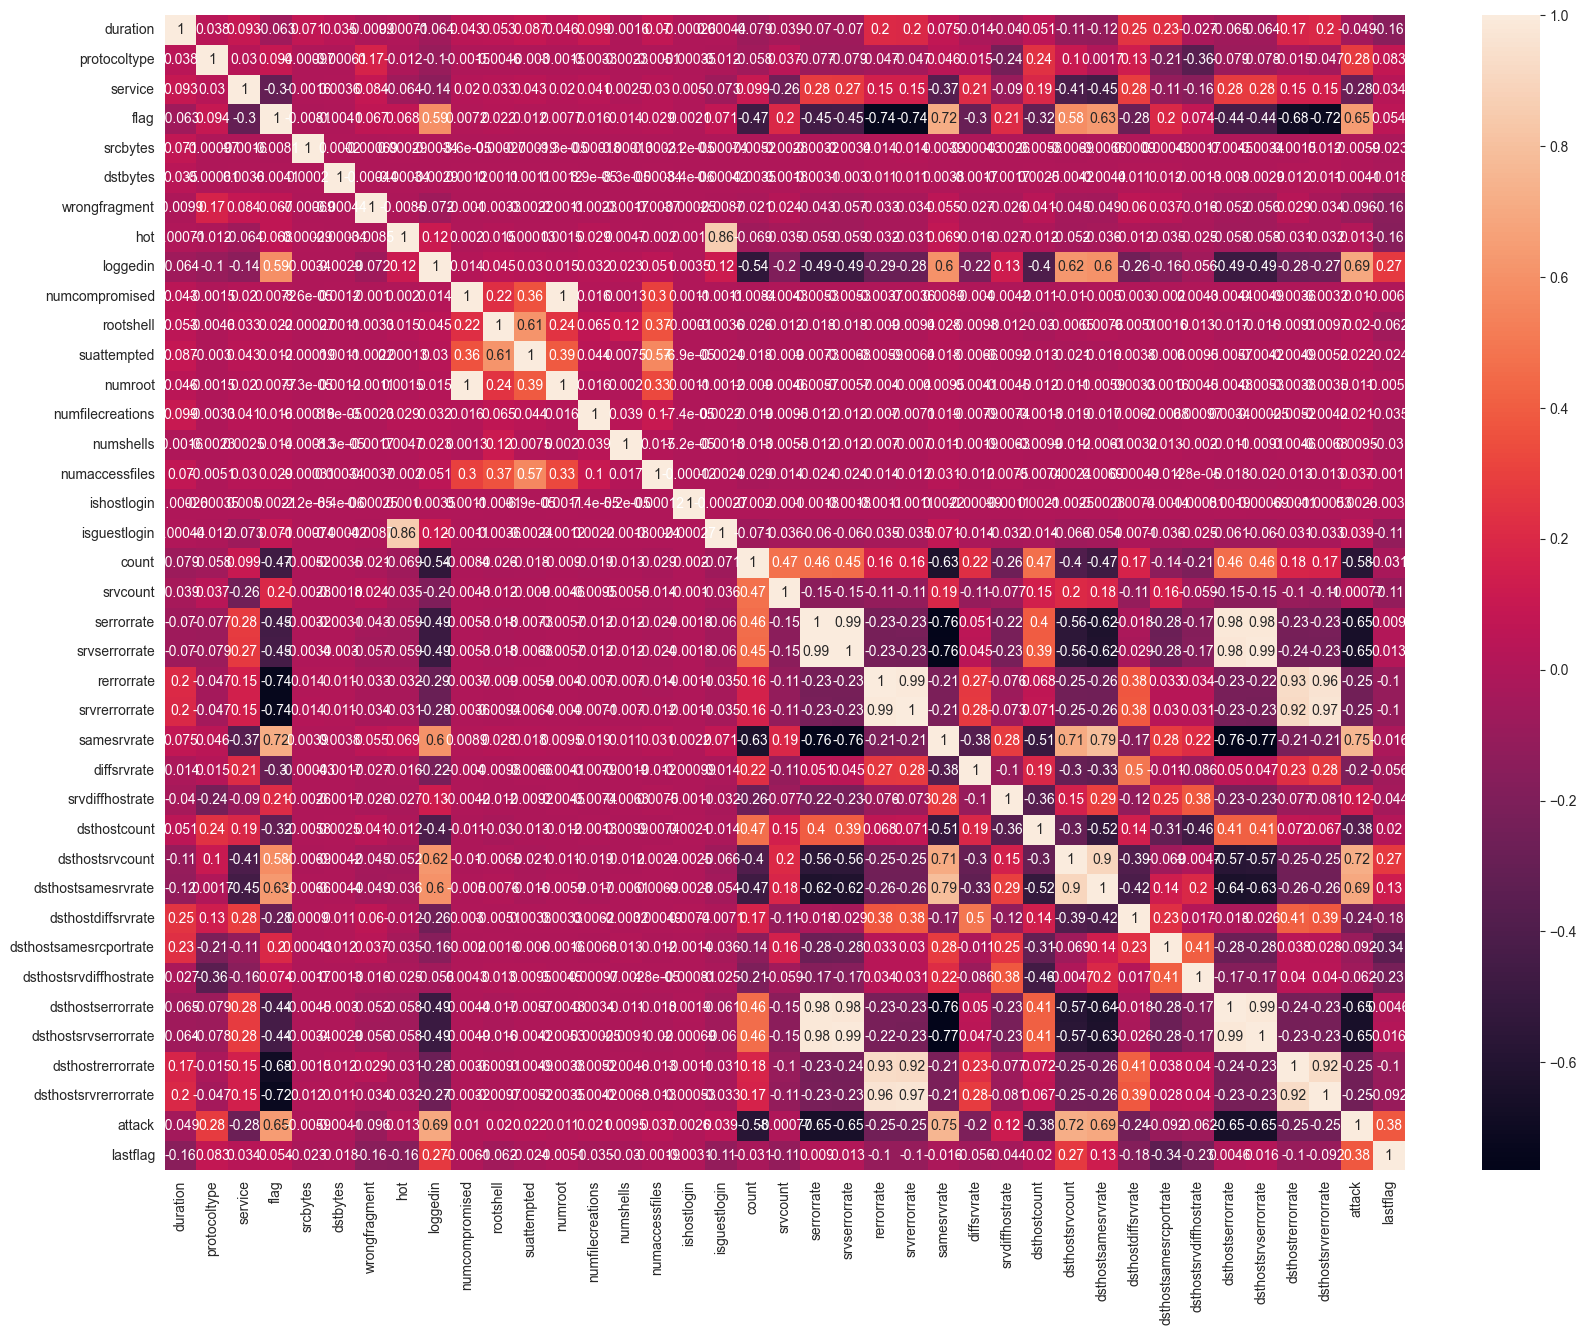

In [176]:
plt.figure(figsize=(20, 15))
sns.heatmap(clean_train_data.corr(), annot=True)

In [177]:
scaler = MinMaxScaler()

In [178]:
X = clean_train_data.drop("attack", axis=1)

In [179]:
X_scaled = scaler.fit_transform(X)

In [180]:
y = clean_train_data['attack']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

In [182]:
X_train.shape

(94479, 38)

# Training Logistic Regression Algorithm

In [188]:
logistic_regression = LogisticRegression()

In [189]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [192]:
predictions = logistic_regression.predict(X_test)
print(predictions)

[1 0 0 ... 1 1 0]


In [191]:
sum(predictions == y_test.values) / len(predictions)

np.float64(0.9750111132279164)

# Finding the Best Set of Parameters - Hyperparameter Optimization

In [194]:
parameter_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [196]:
logistic_regression = LogisticRegression()
grid_search_cv = GridSearchCV(logistic_regression, parameter_grid, cv=5)

In [197]:
grid_search_cv.fit(X_train, y_train)

/Users/david/IdeProjects/python-ai-network-security/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/david/IdeProjects/python-ai-network-security/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [198]:
grid_search_cv.best_params_

{'C': 100, 'penalty': 'l2'}

In [199]:
grid_search_cv.best_estimator_

LogisticRegression(C=100)

In [200]:
new_predictions = grid_search_cv.best_estimator_.predict(X_test)

In [201]:
sum(new_predictions == y_test.values) / len(new_predictions)

np.float64(0.976090683939798)